# Algorithm Evalutaion
1. Finding the best algorithm for given data.

In [24]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [25]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target feature - loan_status
1. 0 - Loan Rejected
2. 1 - Loan Approved

### Step 2 - Perform Basic Data Quality checks

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [27]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y

In [29]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [30]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [31]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [32]:
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

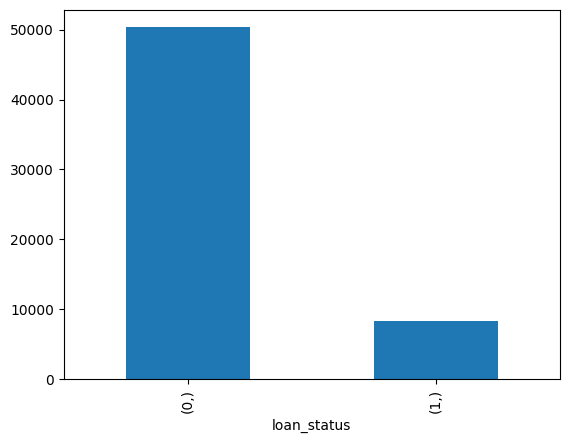

In [33]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply preprocessing on X

In [34]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [35]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [36]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [37]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [40]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [41]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [42]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5 - Train Test Split on X_pre

In [43]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=46)

In [44]:
xtrain.shape

(35187, 26)

In [45]:
ytrain.shape

(35187, 1)

In [46]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
18736,-0.920057,-0.897587,-0.682117,0.500101,-0.019071,2.625802,-0.450108,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48528,-0.091305,0.420604,0.833130,1.578509,-0.098157,0.771749,0.294464,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42459,-0.257055,-0.040763,1.338212,0.500101,-1.043894,0.335502,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45255,-0.422806,0.420604,0.075506,0.500101,-1.116389,-0.100746,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1080,0.240196,1.211518,2.095835,-0.128970,-1.363533,-0.864180,0.046274,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
25318,-0.920057,-0.660313,-0.177035,-0.362625,2.244765,0.226440,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2611,-0.588556,0.420604,-0.429576,-0.758041,-1.043894,-1.082304,-0.450108,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4239,0.240196,-0.756540,-0.429576,-0.758041,-0.226672,-0.209808,0.542655,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14042,-0.754307,0.064692,-1.187200,-0.937775,-1.238314,-1.082304,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22701,3.389456,-0.923951,-1.187200,-1.207377,-0.720959,-0.755118,1.535417,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
ytest.head()

,loan_status
25318,1
2611,0
4239,0
14042,0
22701,0


### Step 6 - Algorithm Evaluation
1. SVM and KNN are suitable for smaller datasets upto 1000 rows
2. Skip SVM and KNN for this dataset

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [50]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [51]:
models[0].__class__.__name__

'LogisticRegression'

In [52]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [53]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):

    # Fit the model 
    model.fit(xtrain, ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculated f1_macro for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # 5 fold crossvalidaton on train data
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
    f1_cv = scores.mean()

    # Create a dictionary for final results
    res = {
        "model_name": model.__class__.__name__,
        "model": model,
        "f1 train": f1_train,
        "f1 test": f1_test,
        "f1 cv": f1_cv
    }

    return res

In [58]:
def algo_evaluation(models : list, xtrain, ytrain, xtest, ytest):

    # Initialize blank list for results
    results = []

    # Apply for loop on models
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(r)
        results.append(r)

    # Save the results in dataframe
    res_df = pd.DataFrame(results)

    # Sort the results 
    sort_df = res_df.sort_values(by="f1 cv", ascending=False).reset_index(drop=True)

    # Get the best model
    best_model = sort_df.iloc[0]["model"]

    return sort_df.round(4), best_model
    

In [55]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [59]:
res_df, best_model = algo_evaluation(models, xtrain, ytrain, xtest, ytest)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'f1 train': np.float64(0.7909572978956746), 'f1 test': np.float64(0.7906081290520344), 'f1 cv': np.float64(0.7913078915798941)}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1 train': np.float64(1.0), 'f1 test': np.float64(0.8270044499568413), 'f1 cv': np.float64(0.818155051168737)}
{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1 train': np.float64(0.9998833781885561), 'f1 test': np.float64(0.8913770632936957), 'f1 cv': np.float64(0.8846631927316547)}
{'model_name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1 train': np.float64(0.886800504268195), 'f1 test': np.float64(0.8898484723287465), 'f1 cv': np.float64(0.8837503249632814)}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, d

In [60]:
res_df

,model_name,model,f1 train,f1 test,f1 cv
0,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9290,0.8967,0.8881
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9999,0.8914,0.8847
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.8868,0.8898,0.8838
3,DecisionTreeClassifier,DecisionTreeClassifier(),1.0000,0.8270,0.8182
4,LogisticRegression,LogisticRegression(),0.7910,0.7906,0.7913


In [61]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluate the best model

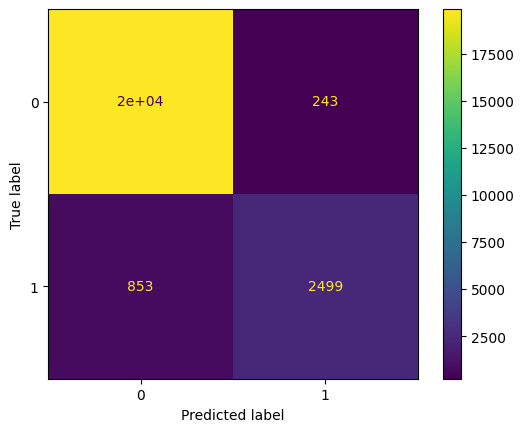

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [64]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [65]:
ytest.head()

,loan_status
25318,1
2611,0
4239,0
14042,0
22701,0


In [66]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     20106
           1       0.91      0.75      0.82      3352

    accuracy                           0.95     23458
   macro avg       0.94      0.87      0.90     23458
weighted avg       0.95      0.95      0.95     23458



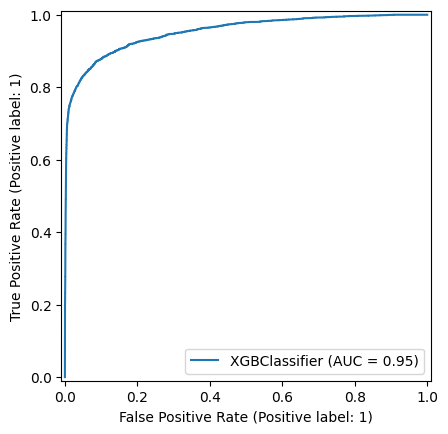

In [67]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [70]:
roc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring="roc_auc")

roc_scores

array([0.9432481 , 0.94493574, 0.95079245, 0.95084187, 0.94865352])

In [71]:
roc_scores.mean()

np.float64(0.9476943340708754)

### Above meterics confirm theat XGBoost is the best model for this dataset
### I can use this model for Out Of Sample prediction

In [72]:
best_model.feature_importances_

array([0.00773437, 0.01880601, 0.01326544, 0.00663046, 0.02779063,
       0.0826169 , 0.00582071, 0.01126811, 0.00385884, 0.03888936,
       0.16615134, 0.04805859, 0.00734975, 0.02858967, 0.0499417 ,
       0.00931581, 0.01604322, 0.01817153, 0.00828055, 0.04793158,
       0.25185722, 0.11791811, 0.00709576, 0.00194038, 0.00467394,
       0.        ], dtype=float32)

In [73]:
xtrain.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length',
       'cat__person_home_ownership_MORTGAGE',
       'cat__person_home_ownership_OTHER', 'cat__person_home_ownership_OWN',
       'cat__person_home_ownership_RENT', 'cat__loan_intent_DEBTCONSOLIDATION',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_A', 'cat__loan_grade_B',
       'cat__loan_grade_C', 'cat__loan_grade_D', 'cat__loan_grade_E',
       'cat__loan_grade_F', 'cat__loan_grade_G',
       'cat__cb_person_default_on_file_N', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [74]:
imp = pd.Series(best_model.feature_importances_, index=xtrain.columns)

sort_imp = imp.sort_values(ascending=False)

sort_imp

cat__loan_grade_D                      0.251857
cat__person_home_ownership_RENT        0.166151
cat__loan_grade_E                      0.117918
num__loan_percent_income               0.082617
cat__loan_intent_MEDICAL               0.049942
cat__loan_intent_DEBTCONSOLIDATION     0.048059
cat__loan_grade_C                      0.047932
cat__person_home_ownership_OWN         0.038889
cat__loan_intent_HOMEIMPROVEMENT       0.028590
num__loan_int_rate                     0.027791
num__person_income                     0.018806
cat__loan_grade_A                      0.018172
cat__loan_intent_VENTURE               0.016043
num__person_emp_length                 0.013265
cat__person_home_ownership_MORTGAGE    0.011268
cat__loan_intent_PERSONAL              0.009316
cat__loan_grade_B                      0.008281
num__person_age                        0.007734
cat__loan_intent_EDUCATION             0.007350
cat__loan_grade_F                      0.007096
num__loan_amnt                         0

<Axes: >

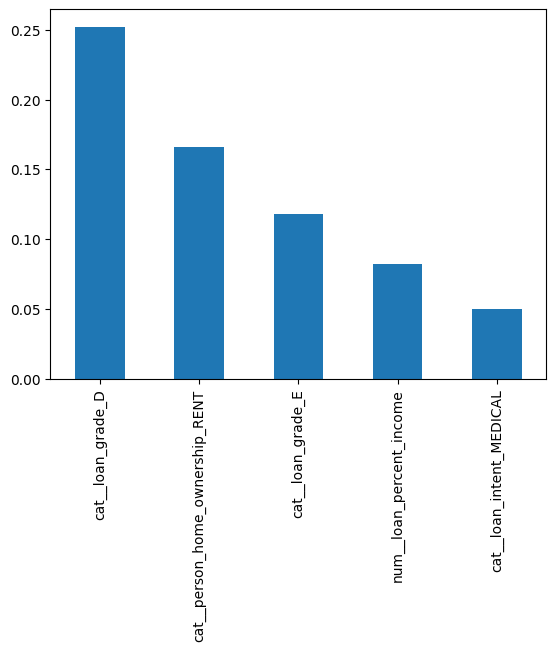

In [75]:
sort_imp[0:5].plot(kind="bar")

### Step 8 - Out of sample predictiion

In [76]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [77]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [78]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.920057,-0.865950,-0.682117,-1.117510,-0.101452,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,-0.920057,-0.423038,0.328047,-0.398572,-1.531591,-0.100746,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,3.886707,-0.106673,-1.187200,1.039305,-1.043894,0.989873,4.761895,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,-0.920057,-0.739404,-0.177035,0.859570,1.628554,2.516741,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [80]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [81]:
best_model.classes_

array([0, 1])

In [82]:
probs = best_model.predict_proba(xnew_pre)[:,1]
probs

array([0.9988311 , 0.00885265, 0.83955747, ..., 0.00815853, 0.16729812,
       0.9797366 ], dtype=float32)

### Save the above results in dataframe

In [83]:
res = xnew[["id"]]
res

,id
0,58645
1,58646
2,58647
3,58648
4,58649
...,...
39093,97738
39094,97739
39095,97740
39096,97741


In [84]:
res["loan_pred"] = preds
res["prob"] = probs

In [86]:
res = res.round(4)
res

,id,loan_pred,prob
0,58645,1,0.9988
1,58646,0,0.0089
2,58647,1,0.8396
3,58648,0,0.0124
4,58649,0,0.0531
...,...,...,...
39093,97738,0,0.0059
39094,97739,0,0.0028
39095,97740,0,0.0082
39096,97741,0,0.1673


In [87]:
res["loan_pred"].value_counts()

loan_pred
0    34742
1     4356
Name: count, dtype: int64

<Axes: xlabel='loan_pred'>

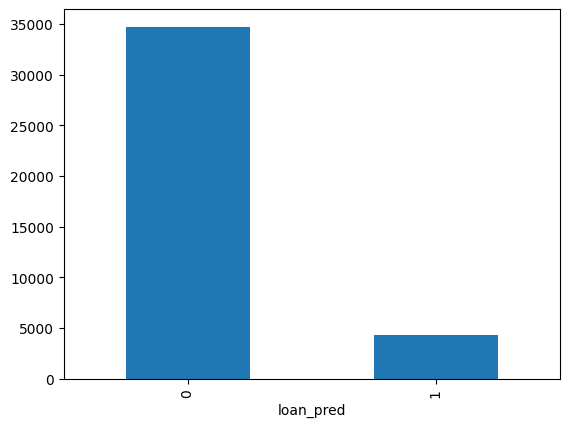

In [88]:
res["loan_pred"].value_counts().plot(kind="bar")

In [89]:
res.to_csv("XGBResults.csv", index=False)

### Save the model object and the preprocessor

In [90]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [91]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
import joblib 

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [93]:
joblib.dump(best_model, "loan_xgb.joblib")

['loan_xgb.joblib']

### Load the objects

In [94]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [96]:
m = joblib.load("loan_xgb.joblib")
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)